<a href="https://colab.research.google.com/github/MS-H2020/Open/blob/main/PCB_defect.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# PCB defect detection

##### Thanks to [Samyak Jain](https://medium.com/the-modern-scientist/yolov8-training-on-custom-data-3460f922ce86)

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!pip install ultralytics
!pip install -U ultralytics sahi

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.3/41.3 kB 1.8 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_nccl_cu12-2.20.5-py3-none-manylinux2014_x86_64.

In [3]:
import ultralytics
from ultralytics import YOLO

In [4]:
import shutil
shutil.unpack_archive('/content/drive/MyDrive/PCB_Dataset_Defect.zip', './PCB_Dataset_Defect')

In [10]:
text ="""
path: ../PCB_Dataset_Defect
train: train/images
val: valid/images

# Classes
nc: 6
names: ['missing_hole','mouse_bite','open_circuit','short', 'spur','spurious_copper']
"""

with open('./data.yaml', 'w') as file:
    file.write(text)

In [6]:
model = YOLO('yolov8n.pt')

100%|██████████| 6.25M/6.25M [00:00<00:00, 23.2MB/s]


In [11]:
results = model.train(data='./data.yaml', batch=-1, epochs=200, device=0)

Ultralytics YOLOv8.2.82 🚀 Python-3.10.12 torch-2.3.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=./data.yaml, epochs=200, time=None, patience=100, batch=-1, imgsz=640, save=True, save_period=-1, cache=False, device=0, workers=8, project=None, name=train3, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, show_boxes=True, line

100%|██████████| 755k/755k [00:00<00:00, 4.31MB/s]


Overriding model.yaml nc=80 with nc=6

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.block.C2f             [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.block.C2f             [64, 64, 2, True]             
  5                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  7                  -1  1    295424  ultralytics

train: Scanning /content/PCB_Dataset_Defect/train/labels... 541 images, 0 backgrounds, 0 corrupt: 100%|██████████| 541/541 [00:00<00:00, 2016.03it/s]

train: New cache created: /content/PCB_Dataset_Defect/train/labels.cache


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
val: Scanning /content/PCB_Dataset_Defect/valid/labels... 62 images, 0 backgrounds, 0 corrupt: 100%|██████████| 62/62 [00:00<00:00, 806.78it/s]

val: New cache created: /content/PCB_Dataset_Defect/valid/labels.cache


Plotting labels to runs/detect/train3/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005625000000000001), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/train3
Starting training for 200 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      1/200      9.63G      4.293      10.62      2.293        208        640: 100%|██████████| 8/8 [00:43<00:00,  5.47s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:04<00:00,  4.57s/it]

                   all         62        273          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      2/200      9.43G      3.817      8.299      1.867        248        640: 100%|██████████| 8/8 [00:27<00:00,  3.39s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.22s/it]

                   all         62        273          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      3/200      9.57G      3.358      6.337       1.42        235        640: 100%|██████████| 8/8 [00:26<00:00,  3.33s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:02<00:00,  2.07s/it]

                   all         62        273          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      4/200      9.55G      3.027      5.436      1.253        251        640: 100%|██████████| 8/8 [00:18<00:00,  2.35s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.42s/it]

                   all         62        273          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      5/200      9.43G      2.763       4.84      1.157        210        640: 100%|██████████| 8/8 [00:14<00:00,  1.79s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.29s/it]

                   all         62        273          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      6/200      9.59G      2.664      4.222       1.13        221        640: 100%|██████████| 8/8 [00:11<00:00,  1.46s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.51s/it]

                   all         62        273    0.00395      0.242     0.0645     0.0305



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      7/200      9.57G       2.51      3.799       1.08        256        640: 100%|██████████| 8/8 [00:08<00:00,  1.09s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.25s/it]

                   all         62        273    0.00744      0.432      0.127     0.0595



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      8/200      9.43G      2.447      3.444      1.061        292        640: 100%|██████████| 8/8 [00:10<00:00,  1.26s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.04s/it]

                   all         62        273    0.00603      0.347      0.138     0.0559



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      9/200      9.55G      2.315      3.047      1.031        268        640: 100%|██████████| 8/8 [00:10<00:00,  1.31s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.06s/it]

                   all         62        273      0.251      0.105      0.142     0.0566



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     10/200      9.55G       2.32      2.892      1.037        278        640: 100%|██████████| 8/8 [00:11<00:00,  1.39s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.08it/s]

                   all         62        273      0.815     0.0275      0.186     0.0708



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     11/200      9.55G      2.233      2.615      1.023        236        640: 100%|██████████| 8/8 [00:11<00:00,  1.46s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.83s/it]

                   all         62        273      0.635     0.0819      0.297      0.121



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     12/200      9.55G      2.173      2.504      1.011        282        640: 100%|██████████| 8/8 [00:08<00:00,  1.03s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.59s/it]

                   all         62        273      0.665      0.142      0.332      0.141



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     13/200      9.44G      2.216       2.39      1.018        249        640: 100%|██████████| 8/8 [00:09<00:00,  1.13s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.05s/it]

                   all         62        273      0.817      0.237      0.436      0.189



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     14/200      9.55G      2.105      2.218     0.9914        232        640: 100%|██████████| 8/8 [00:12<00:00,  1.58s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.09s/it]

                   all         62        273      0.807      0.292      0.499      0.214



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     15/200      9.43G      2.059      2.058     0.9928        179        640: 100%|██████████| 8/8 [00:08<00:00,  1.05s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.56s/it]

                   all         62        273      0.569      0.273      0.382      0.166



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     16/200      9.55G      2.094      2.007     0.9773        244        640: 100%|██████████| 8/8 [00:09<00:00,  1.20s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.36s/it]

                   all         62        273      0.802       0.27      0.463        0.2



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     17/200      9.55G      2.082      1.971      0.979        246        640: 100%|██████████| 8/8 [00:08<00:00,  1.12s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.19it/s]

                   all         62        273      0.841      0.315      0.509      0.232



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     18/200      9.43G      2.037      1.837     0.9816        207        640: 100%|██████████| 8/8 [00:11<00:00,  1.44s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.07it/s]

                   all         62        273      0.652      0.536       0.59      0.256



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     19/200      9.43G      1.981      1.777     0.9611        231        640: 100%|██████████| 8/8 [00:09<00:00,  1.22s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.38s/it]

                   all         62        273      0.658      0.592      0.623       0.27



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     20/200      9.55G      2.002      1.732     0.9641        248        640: 100%|██████████| 8/8 [00:10<00:00,  1.32s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.46s/it]

                   all         62        273      0.737      0.602      0.685      0.319



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     21/200      9.44G      1.973      1.661     0.9628        294        640: 100%|██████████| 8/8 [00:10<00:00,  1.36s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.31s/it]

                   all         62        273      0.742      0.552      0.624       0.27



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     22/200      9.44G      1.962      1.594     0.9523        263        640: 100%|██████████| 8/8 [00:09<00:00,  1.20s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.18it/s]

                   all         62        273      0.728      0.596      0.643      0.297



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     23/200      9.55G      2.005      1.578     0.9542        246        640: 100%|██████████| 8/8 [00:09<00:00,  1.24s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.02it/s]

                   all         62        273      0.704      0.594      0.633      0.248



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     24/200      9.44G      1.987      1.552     0.9672        229        640: 100%|██████████| 8/8 [00:10<00:00,  1.26s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.11it/s]

                   all         62        273      0.806      0.642      0.728      0.333



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     25/200      9.55G      1.894      1.442     0.9423        270        640: 100%|██████████| 8/8 [00:08<00:00,  1.05s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.53s/it]

                   all         62        273      0.763      0.657      0.733      0.328



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     26/200      9.43G      1.874      1.408     0.9417        235        640: 100%|██████████| 8/8 [00:09<00:00,  1.25s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.19s/it]

                   all         62        273      0.918      0.593      0.751      0.352



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     27/200      9.43G      1.857      1.387     0.9459        229        640: 100%|██████████| 8/8 [00:08<00:00,  1.08s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.16it/s]

                   all         62        273       0.83      0.633      0.707      0.322



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     28/200      9.59G       1.84      1.328     0.9338        223        640: 100%|██████████| 8/8 [00:12<00:00,  1.61s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.76s/it]

                   all         62        273      0.859      0.661      0.752       0.36



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     29/200      9.55G       1.89      1.373     0.9513        221        640: 100%|██████████| 8/8 [00:11<00:00,  1.48s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.11it/s]

                   all         62        273      0.819      0.663      0.726      0.298



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     30/200      9.44G      1.843      1.293     0.9421        266        640: 100%|██████████| 8/8 [00:11<00:00,  1.41s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.44s/it]

                   all         62        273      0.776      0.691      0.737      0.318



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     31/200      9.56G      1.807      1.262     0.9326        211        640: 100%|██████████| 8/8 [00:07<00:00,  1.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.43s/it]

                   all         62        273      0.784      0.605      0.685      0.261



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     32/200      9.43G      1.823      1.261     0.9303        242        640: 100%|██████████| 8/8 [00:09<00:00,  1.16s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.12it/s]

                   all         62        273      0.783      0.651      0.711      0.293



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     33/200      9.44G      1.817      1.246     0.9432        246        640: 100%|██████████| 8/8 [00:12<00:00,  1.55s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.09it/s]

                   all         62        273      0.784      0.727      0.773      0.361



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     34/200      9.44G      1.798      1.227      0.938        213        640: 100%|██████████| 8/8 [00:11<00:00,  1.42s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.17it/s]

                   all         62        273      0.818      0.693      0.772      0.367



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     35/200      9.56G      1.824      1.229     0.9222        215        640: 100%|██████████| 8/8 [00:09<00:00,  1.15s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.59s/it]

                   all         62        273      0.818      0.742      0.792      0.379



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     36/200      9.43G      1.796       1.18     0.9216        247        640: 100%|██████████| 8/8 [00:08<00:00,  1.07s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.06s/it]

                   all         62        273      0.886      0.723      0.802      0.389



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     37/200      9.43G      1.833      1.202     0.9259        240        640: 100%|██████████| 8/8 [00:09<00:00,  1.19s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.30it/s]

                   all         62        273      0.867      0.711      0.762      0.348



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     38/200      9.59G      1.759      1.108     0.9246        235        640: 100%|██████████| 8/8 [00:13<00:00,  1.67s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.38it/s]

                   all         62        273      0.817      0.747      0.796      0.343



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     39/200      9.44G      1.769      1.156     0.9164        235        640: 100%|██████████| 8/8 [00:11<00:00,  1.38s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.38s/it]

                   all         62        273      0.831      0.723      0.793       0.37



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     40/200      9.56G       1.77      1.124     0.9256        208        640: 100%|██████████| 8/8 [00:10<00:00,  1.28s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.47s/it]

                   all         62        273      0.873      0.782      0.834      0.425



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     41/200      9.44G        1.8      1.154     0.9199        257        640: 100%|██████████| 8/8 [00:10<00:00,  1.33s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.45s/it]

                   all         62        273       0.85      0.763      0.812      0.404



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     42/200      9.55G        1.8      1.146       0.92        244        640: 100%|██████████| 8/8 [00:10<00:00,  1.29s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.72s/it]

                   all         62        273      0.887       0.76      0.833        0.4



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     43/200      9.59G       1.78      1.107     0.9285        212        640: 100%|██████████| 8/8 [00:10<00:00,  1.29s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.08it/s]

                   all         62        273      0.876      0.714      0.786      0.354



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     44/200      9.44G      1.715      1.046     0.9259        215        640: 100%|██████████| 8/8 [00:12<00:00,  1.60s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.15it/s]

                   all         62        273      0.924      0.769      0.841      0.392



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     45/200      9.44G      1.697      1.043     0.9066        233        640: 100%|██████████| 8/8 [00:13<00:00,  1.63s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.44it/s]

                   all         62        273      0.879      0.706      0.809      0.367



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     46/200      9.43G      1.749      1.101     0.9178        282        640: 100%|██████████| 8/8 [00:10<00:00,  1.25s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.65s/it]

                   all         62        273      0.884      0.718      0.812      0.387



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     47/200      9.44G      1.704       1.05     0.9047        213        640: 100%|██████████| 8/8 [00:10<00:00,  1.30s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.32s/it]

                   all         62        273      0.872      0.761      0.839      0.398



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     48/200      9.57G      1.697       1.03     0.9151        231        640: 100%|██████████| 8/8 [00:09<00:00,  1.16s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.01it/s]

                   all         62        273      0.917       0.78      0.862      0.431



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     49/200      9.55G      1.707      1.049     0.9149        217        640: 100%|██████████| 8/8 [00:12<00:00,  1.57s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.12it/s]

                   all         62        273      0.925      0.781      0.864       0.43



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     50/200       9.6G      1.686      1.015     0.9088        235        640: 100%|██████████| 8/8 [00:11<00:00,  1.46s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.17it/s]

                   all         62        273      0.902      0.764      0.846      0.415



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     51/200      9.44G      1.667     0.9858     0.9038        251        640: 100%|██████████| 8/8 [00:11<00:00,  1.40s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.10s/it]

                   all         62        273      0.916      0.789      0.865      0.425



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     52/200       9.6G      1.669      1.002     0.9032        261        640: 100%|██████████| 8/8 [00:10<00:00,  1.27s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.42s/it]

                   all         62        273      0.934      0.775      0.861       0.41



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     53/200      9.44G      1.643     0.9759     0.9009        237        640: 100%|██████████| 8/8 [00:08<00:00,  1.02s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.13it/s]

                   all         62        273      0.884      0.765      0.834       0.41



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     54/200      9.59G      1.642     0.9628     0.8964        220        640: 100%|██████████| 8/8 [00:11<00:00,  1.46s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.07it/s]

                   all         62        273      0.867       0.78      0.851      0.435



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     55/200      9.57G      1.673     0.9662      0.899        251        640: 100%|██████████| 8/8 [00:12<00:00,  1.58s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.19s/it]

                   all         62        273      0.839      0.798      0.841      0.408



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     56/200      9.57G      1.663     0.9688     0.9069        269        640: 100%|██████████| 8/8 [00:11<00:00,  1.49s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.06s/it]

                   all         62        273       0.92      0.772      0.847      0.424



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     57/200      9.44G      1.681     0.9757     0.9046        258        640: 100%|██████████| 8/8 [00:11<00:00,  1.43s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.43s/it]

                   all         62        273      0.909      0.788      0.865      0.436



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     58/200      9.55G      1.638     0.9618     0.8901        196        640: 100%|██████████| 8/8 [00:09<00:00,  1.17s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:02<00:00,  2.83s/it]

                   all         62        273      0.893      0.814      0.853      0.415



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     59/200      9.43G      1.628     0.9636     0.8945        198        640: 100%|██████████| 8/8 [00:09<00:00,  1.18s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.20it/s]

                   all         62        273      0.882      0.795      0.864      0.426



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     60/200      9.44G      1.602     0.9336     0.8936        227        640: 100%|██████████| 8/8 [00:10<00:00,  1.28s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.31it/s]

                   all         62        273      0.859      0.771      0.838      0.384



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     61/200      9.43G      1.607     0.9278     0.8896        238        640: 100%|██████████| 8/8 [00:13<00:00,  1.66s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.17it/s]

                   all         62        273      0.897      0.823      0.868      0.413



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     62/200      9.55G      1.638     0.9374     0.8959        219        640: 100%|██████████| 8/8 [00:10<00:00,  1.29s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.52s/it]

                   all         62        273      0.911        0.8       0.86      0.399



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     63/200      9.55G      1.592       0.91     0.9005        227        640: 100%|██████████| 8/8 [00:09<00:00,  1.16s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.28s/it]

                   all         62        273      0.883       0.82      0.873      0.429



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     64/200      9.43G      1.629     0.9285     0.8949        230        640: 100%|██████████| 8/8 [00:09<00:00,  1.18s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.08it/s]

                   all         62        273      0.889      0.806      0.872      0.429



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     65/200      9.43G      1.639     0.9174     0.8908        242        640: 100%|██████████| 8/8 [00:10<00:00,  1.37s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:02<00:00,  2.02s/it]

                   all         62        273      0.926      0.788      0.859      0.415



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     66/200      9.56G      1.586     0.8919     0.8922        255        640: 100%|██████████| 8/8 [00:10<00:00,  1.33s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.02s/it]

                   all         62        273      0.877      0.816      0.874      0.439



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     67/200      9.43G      1.584     0.9094     0.8907        241        640: 100%|██████████| 8/8 [00:08<00:00,  1.08s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.34s/it]

                   all         62        273      0.904      0.786      0.851      0.408



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     68/200      9.43G      1.591     0.8963     0.8834        267        640: 100%|██████████| 8/8 [00:14<00:00,  1.77s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.48s/it]

                   all         62        273      0.871       0.79       0.82       0.31



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     69/200      9.43G      1.666     0.9142     0.9013        237        640: 100%|██████████| 8/8 [00:09<00:00,  1.14s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.38s/it]

                   all         62        273      0.888      0.834      0.858      0.375



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     70/200      9.43G      1.574     0.8908     0.8877        263        640: 100%|██████████| 8/8 [00:13<00:00,  1.67s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.21it/s]

                   all         62        273      0.856      0.821      0.848      0.379



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     71/200      9.56G       1.58     0.8953     0.8882        221        640: 100%|██████████| 8/8 [00:10<00:00,  1.28s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.07it/s]

                   all         62        273       0.88      0.835       0.88      0.424



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     72/200      9.59G      1.598     0.8912      0.891        276        640: 100%|██████████| 8/8 [00:12<00:00,  1.55s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.40it/s]

                   all         62        273      0.949      0.816      0.894      0.457



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     73/200      9.59G      1.555     0.8748     0.8889        261        640: 100%|██████████| 8/8 [00:10<00:00,  1.27s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.59s/it]

                   all         62        273      0.927      0.812      0.882      0.445



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     74/200      9.44G      1.557     0.8621     0.8812        245        640: 100%|██████████| 8/8 [00:08<00:00,  1.10s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.33s/it]

                   all         62        273      0.891      0.792      0.868      0.434



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     75/200      9.43G      1.584     0.8798     0.8829        254        640: 100%|██████████| 8/8 [00:10<00:00,  1.32s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.14it/s]

                   all         62        273       0.89      0.808      0.876      0.438



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     76/200      9.55G      1.558     0.8646     0.8885        240        640: 100%|██████████| 8/8 [00:10<00:00,  1.28s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.12it/s]

                   all         62        273      0.937      0.816      0.885       0.45



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     77/200      9.44G      1.608      0.883     0.8927        261        640: 100%|██████████| 8/8 [00:11<00:00,  1.43s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.14it/s]

                   all         62        273      0.863       0.85      0.893       0.44



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     78/200      9.56G       1.52     0.8496     0.8763        236        640: 100%|██████████| 8/8 [00:08<00:00,  1.09s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.61s/it]

                   all         62        273      0.876      0.838      0.886      0.441



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     79/200      9.44G      1.559     0.8578     0.8848        253        640: 100%|██████████| 8/8 [00:08<00:00,  1.07s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.13s/it]

                   all         62        273      0.898      0.868      0.901      0.451



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     80/200      9.56G      1.566     0.8579     0.8874        218        640: 100%|██████████| 8/8 [00:10<00:00,  1.34s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.04it/s]

                   all         62        273       0.91      0.831      0.885      0.431



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     81/200      9.44G      1.498     0.8281     0.8768        218        640: 100%|██████████| 8/8 [00:11<00:00,  1.44s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.15it/s]

                   all         62        273      0.905      0.847      0.878      0.413



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     82/200      9.55G      1.535     0.8415      0.878        212        640: 100%|██████████| 8/8 [00:13<00:00,  1.74s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.13s/it]

                   all         62        273      0.932      0.833      0.892      0.447



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     83/200      9.44G      1.509     0.8301     0.8788        196        640: 100%|██████████| 8/8 [00:08<00:00,  1.06s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.47s/it]

                   all         62        273      0.921      0.858      0.894      0.436



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     84/200      9.43G      1.502     0.8169     0.8784        224        640: 100%|██████████| 8/8 [00:08<00:00,  1.07s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.20it/s]

                   all         62        273      0.921      0.859      0.898      0.427



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     85/200      9.44G      1.526     0.8628     0.8746        272        640: 100%|██████████| 8/8 [00:11<00:00,  1.48s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.16it/s]

                   all         62        273      0.922      0.836      0.889      0.431



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     86/200      9.55G      1.564     0.8395     0.8848        255        640: 100%|██████████| 8/8 [00:10<00:00,  1.35s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.24it/s]

                   all         62        273      0.928      0.856      0.901      0.467



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     87/200      9.44G      1.554     0.8246     0.8807        251        640: 100%|██████████| 8/8 [00:08<00:00,  1.03s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:02<00:00,  2.99s/it]


                   all         62        273      0.915      0.851        0.9      0.448

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     88/200      9.43G      1.503        0.8     0.8703        222        640: 100%|██████████| 8/8 [00:08<00:00,  1.02s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.07it/s]

                   all         62        273      0.918      0.855      0.909      0.463



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     89/200      9.55G      1.513     0.8246     0.8775        277        640: 100%|██████████| 8/8 [00:11<00:00,  1.38s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.06s/it]

                   all         62        273      0.937      0.834      0.906      0.449



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     90/200      9.56G      1.498     0.8117     0.8728        206        640: 100%|██████████| 8/8 [00:14<00:00,  1.78s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.07s/it]

                   all         62        273       0.93      0.842      0.898       0.43



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     91/200      9.55G       1.51     0.8092     0.8776        219        640: 100%|██████████| 8/8 [00:13<00:00,  1.64s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.14it/s]

                   all         62        273      0.935       0.86      0.921      0.454



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     92/200      9.57G      1.532     0.8121     0.8768        185        640: 100%|██████████| 8/8 [00:12<00:00,  1.57s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.26s/it]

                   all         62        273      0.929       0.82      0.895      0.454



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     93/200      9.56G      1.556      0.819     0.8807        251        640: 100%|██████████| 8/8 [00:08<00:00,  1.04s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.49s/it]

                   all         62        273      0.918      0.825      0.909      0.456



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     94/200      9.55G      1.465     0.7957     0.8744        262        640: 100%|██████████| 8/8 [00:12<00:00,  1.52s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.28s/it]

                   all         62        273      0.927      0.834      0.916      0.457



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     95/200      9.44G      1.477     0.8001     0.8748        257        640: 100%|██████████| 8/8 [00:11<00:00,  1.39s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.17it/s]

                   all         62        273      0.902      0.855      0.899      0.463



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     96/200      9.56G      1.476     0.7795     0.8797        225        640: 100%|██████████| 8/8 [00:12<00:00,  1.56s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.45it/s]

                   all         62        273      0.929      0.845      0.908      0.429



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     97/200      9.44G      1.442     0.7854      0.865        243        640: 100%|██████████| 8/8 [00:12<00:00,  1.52s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.19it/s]

                   all         62        273      0.906      0.866      0.897      0.435



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     98/200      9.56G      1.452     0.7694     0.8764        265        640: 100%|██████████| 8/8 [00:09<00:00,  1.25s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:02<00:00,  2.81s/it]

                   all         62        273       0.95      0.841      0.899      0.445



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     99/200      9.43G      1.502     0.7999     0.8669        240        640: 100%|██████████| 8/8 [00:08<00:00,  1.11s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.29s/it]

                   all         62        273      0.931      0.857      0.898      0.433



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    100/200      9.44G       1.49     0.8052      0.867        251        640: 100%|██████████| 8/8 [00:09<00:00,  1.18s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.20it/s]

                   all         62        273      0.951      0.847      0.915      0.459



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    101/200      9.56G      1.478     0.7992     0.8678        245        640: 100%|██████████| 8/8 [00:11<00:00,  1.42s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.13it/s]

                   all         62        273      0.916      0.854      0.898      0.436



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    102/200      9.44G      1.435     0.7714     0.8687        257        640: 100%|██████████| 8/8 [00:11<00:00,  1.46s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.19it/s]

                   all         62        273      0.922      0.838       0.89      0.408



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    103/200      9.43G       1.45     0.7603     0.8734        233        640: 100%|██████████| 8/8 [00:11<00:00,  1.48s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.36s/it]

                   all         62        273      0.972      0.818      0.902      0.436



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    104/200      9.44G      1.434      0.755      0.864        210        640: 100%|██████████| 8/8 [00:07<00:00,  1.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.42s/it]

                   all         62        273      0.939      0.872      0.919      0.457



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    105/200      9.59G       1.48     0.7738     0.8743        271        640: 100%|██████████| 8/8 [00:08<00:00,  1.11s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.19it/s]

                   all         62        273       0.94      0.854      0.911      0.446



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    106/200      9.59G       1.47     0.7744     0.8676        257        640: 100%|██████████| 8/8 [00:13<00:00,  1.64s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.28it/s]

                   all         62        273      0.915      0.859        0.9      0.423



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    107/200      9.44G      1.436     0.7575      0.874        248        640: 100%|██████████| 8/8 [00:10<00:00,  1.31s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.43s/it]

                   all         62        273      0.938       0.85      0.907      0.458



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    108/200      9.55G      1.412     0.7436     0.8651        223        640: 100%|██████████| 8/8 [00:09<00:00,  1.24s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.81s/it]

                   all         62        273      0.944      0.866      0.908      0.466



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    109/200      9.56G      1.435     0.7559     0.8664        240        640: 100%|██████████| 8/8 [00:08<00:00,  1.06s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.16it/s]

                   all         62        273      0.915      0.875      0.889      0.439



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    110/200      9.55G      1.434     0.7488     0.8661        268        640: 100%|██████████| 8/8 [00:10<00:00,  1.31s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.15it/s]

                   all         62        273       0.92      0.891      0.914      0.446



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    111/200      9.55G      1.452      0.761     0.8692        202        640: 100%|██████████| 8/8 [00:12<00:00,  1.60s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.32it/s]

                   all         62        273      0.947      0.839      0.912      0.455



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    112/200      9.57G      1.444     0.7572     0.8647        248        640: 100%|██████████| 8/8 [00:09<00:00,  1.16s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.63s/it]

                   all         62        273      0.925      0.897      0.917      0.461



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    113/200      9.43G      1.431      0.759     0.8644        219        640: 100%|██████████| 8/8 [00:09<00:00,  1.19s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.33s/it]

                   all         62        273      0.943      0.832      0.903      0.465



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    114/200      9.55G      1.398     0.7248     0.8669        237        640: 100%|██████████| 8/8 [00:09<00:00,  1.16s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.42it/s]

                   all         62        273      0.928      0.844      0.892      0.435



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    115/200      9.59G      1.396     0.7391     0.8629        209        640: 100%|██████████| 8/8 [00:11<00:00,  1.46s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.25it/s]

                   all         62        273      0.887      0.866      0.891      0.446



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    116/200      9.55G      1.435     0.7475     0.8624        221        640: 100%|██████████| 8/8 [00:10<00:00,  1.27s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.27s/it]

                   all         62        273      0.936      0.854        0.9       0.44



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    117/200      9.56G      1.424     0.7473     0.8683        215        640: 100%|██████████| 8/8 [00:08<00:00,  1.08s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.25s/it]

                   all         62        273      0.935      0.847      0.897      0.432



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    118/200      9.55G      1.409     0.7479     0.8603        246        640: 100%|██████████| 8/8 [00:09<00:00,  1.18s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.06s/it]

                   all         62        273       0.96      0.878      0.925      0.459



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    119/200      9.55G      1.423     0.7507     0.8599        323        640: 100%|██████████| 8/8 [00:10<00:00,  1.35s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.10it/s]

                   all         62        273      0.932       0.85      0.914      0.452



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    120/200      9.44G      1.396     0.7344     0.8581        241        640: 100%|██████████| 8/8 [00:13<00:00,  1.70s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.19it/s]

                   all         62        273      0.894      0.895      0.916      0.439



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    121/200      9.43G      1.401     0.7331     0.8576        243        640: 100%|██████████| 8/8 [00:10<00:00,  1.31s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.32s/it]

                   all         62        273      0.966      0.864      0.921      0.444



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    122/200      9.56G      1.467     0.7586     0.8631        267        640: 100%|██████████| 8/8 [00:08<00:00,  1.11s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.47s/it]

                   all         62        273       0.92      0.889      0.914      0.469



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    123/200      9.55G      1.362     0.7041     0.8525        243        640: 100%|██████████| 8/8 [00:10<00:00,  1.27s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.12it/s]

                   all         62        273      0.963      0.865      0.913      0.464



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    124/200      9.55G      1.373     0.7169     0.8633        195        640: 100%|██████████| 8/8 [00:11<00:00,  1.46s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.20it/s]

                   all         62        273      0.944      0.898      0.912      0.455



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    125/200      9.59G      1.381     0.7181      0.858        200        640: 100%|██████████| 8/8 [00:12<00:00,  1.58s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.46it/s]

                   all         62        273      0.942      0.896       0.91       0.47



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    126/200      9.43G      1.335     0.7003     0.8574        256        640: 100%|██████████| 8/8 [00:09<00:00,  1.14s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.49s/it]

                   all         62        273      0.938      0.859      0.904      0.459



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    127/200      9.55G      1.361     0.6959     0.8557        247        640: 100%|██████████| 8/8 [00:08<00:00,  1.08s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.20it/s]

                   all         62        273      0.942      0.871      0.912      0.463



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    128/200      9.43G      1.358     0.7013     0.8598        217        640: 100%|██████████| 8/8 [00:10<00:00,  1.36s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.09it/s]

                   all         62        273      0.924       0.88      0.901      0.447



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    129/200      9.55G      1.378     0.7038     0.8598        218        640: 100%|██████████| 8/8 [00:12<00:00,  1.56s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.26it/s]

                   all         62        273      0.902      0.841      0.881      0.454



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    130/200      9.59G      1.392     0.7234      0.855        216        640: 100%|██████████| 8/8 [00:14<00:00,  1.77s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.09it/s]

                   all         62        273      0.904      0.866      0.888      0.452



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    131/200      9.55G      1.342     0.7162     0.8559        233        640: 100%|██████████| 8/8 [00:10<00:00,  1.32s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.65s/it]

                   all         62        273      0.923       0.87      0.905      0.462



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    132/200      9.56G      1.324     0.6873     0.8539        213        640: 100%|██████████| 8/8 [00:09<00:00,  1.17s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.30s/it]

                   all         62        273      0.934      0.874      0.906      0.478



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    133/200      9.55G      1.341     0.7035     0.8488        247        640: 100%|██████████| 8/8 [00:10<00:00,  1.27s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.04it/s]

                   all         62        273      0.948       0.86      0.905      0.471



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    134/200      9.59G       1.35     0.6964     0.8568        218        640: 100%|██████████| 8/8 [00:12<00:00,  1.52s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.13it/s]

                   all         62        273      0.957      0.859      0.905      0.453



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    135/200      9.59G      1.299     0.6966     0.8475        228        640: 100%|██████████| 8/8 [00:11<00:00,  1.40s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.34it/s]

                   all         62        273      0.951      0.877       0.92      0.469



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    136/200      9.43G      1.327     0.6903     0.8531        256        640: 100%|██████████| 8/8 [00:10<00:00,  1.27s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.63s/it]

                   all         62        273      0.955       0.86       0.91      0.456



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    137/200      9.56G      1.337      0.701     0.8574        262        640: 100%|██████████| 8/8 [00:08<00:00,  1.02s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.46s/it]

                   all         62        273       0.93      0.883      0.924      0.459



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    138/200      9.56G      1.347     0.6989      0.855        236        640: 100%|██████████| 8/8 [00:09<00:00,  1.15s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.12it/s]

                   all         62        273      0.948      0.881      0.917      0.468



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    139/200      9.44G      1.354     0.7072     0.8556        194        640: 100%|██████████| 8/8 [00:12<00:00,  1.51s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.08it/s]

                   all         62        273      0.942      0.882      0.912      0.458



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    140/200      9.44G       1.32     0.6935     0.8533        219        640: 100%|██████████| 8/8 [00:11<00:00,  1.40s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.31s/it]

                   all         62        273      0.916      0.887      0.896      0.455



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    141/200      9.44G      1.307     0.6764     0.8484        273        640: 100%|██████████| 8/8 [00:10<00:00,  1.32s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:02<00:00,  2.31s/it]

                   all         62        273      0.911      0.882      0.904      0.443



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    142/200      9.55G      1.334     0.6913      0.847        292        640: 100%|██████████| 8/8 [00:09<00:00,  1.17s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.42s/it]

                   all         62        273      0.934       0.86      0.915      0.456



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    143/200      9.44G      1.338     0.7006     0.8498        229        640: 100%|██████████| 8/8 [00:10<00:00,  1.30s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.04it/s]

                   all         62        273      0.911      0.874      0.907       0.45



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    144/200      9.56G      1.284     0.6765     0.8495        269        640: 100%|██████████| 8/8 [00:11<00:00,  1.40s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.16it/s]

                   all         62        273      0.923      0.876      0.909      0.453



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    145/200      9.43G       1.31     0.6726     0.8591        230        640: 100%|██████████| 8/8 [00:11<00:00,  1.45s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.14it/s]

                   all         62        273      0.963      0.861      0.912      0.452



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    146/200      9.43G       1.32     0.6903     0.8525        281        640: 100%|██████████| 8/8 [00:10<00:00,  1.37s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.58s/it]

                   all         62        273      0.937      0.878      0.917      0.455



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    147/200      9.56G      1.307     0.6885     0.8546        234        640: 100%|██████████| 8/8 [00:08<00:00,  1.11s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.29s/it]

                   all         62        273      0.932      0.876      0.906      0.461



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    148/200      9.44G      1.277     0.6665      0.848        231        640: 100%|██████████| 8/8 [00:11<00:00,  1.49s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.06s/it]

                   all         62        273      0.945      0.882      0.903      0.469



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    149/200      9.55G      1.314     0.6954      0.845        224        640: 100%|██████████| 8/8 [00:10<00:00,  1.31s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.17it/s]

                   all         62        273      0.928      0.892      0.911      0.446



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    150/200      9.55G       1.29     0.6764     0.8461        274        640: 100%|██████████| 8/8 [00:11<00:00,  1.45s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:02<00:00,  2.25s/it]

                   all         62        273      0.935      0.868      0.904       0.45



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    151/200      9.43G      1.321     0.6873     0.8475        237        640: 100%|██████████| 8/8 [00:10<00:00,  1.32s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.04it/s]

                   all         62        273      0.944      0.859      0.898       0.45



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    152/200      9.43G      1.301     0.6665     0.8517        239        640: 100%|██████████| 8/8 [00:08<00:00,  1.03s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.41s/it]

                   all         62        273      0.935      0.853        0.9      0.445



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    153/200      9.57G      1.256     0.6544      0.843        223        640: 100%|██████████| 8/8 [00:10<00:00,  1.32s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.00s/it]

                   all         62        273      0.944      0.868      0.906      0.458



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    154/200      9.44G      1.299      0.674     0.8396        228        640: 100%|██████████| 8/8 [00:11<00:00,  1.40s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.07it/s]

                   all         62        273      0.924      0.875      0.902      0.439



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    155/200      9.56G      1.278      0.666     0.8525        223        640: 100%|██████████| 8/8 [00:13<00:00,  1.64s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.09s/it]

                   all         62        273      0.957      0.868      0.917      0.461



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    156/200      9.55G      1.287     0.6596     0.8451        201        640: 100%|██████████| 8/8 [00:11<00:00,  1.48s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.15s/it]

                   all         62        273      0.953      0.868      0.913      0.443



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    157/200      9.55G      1.278     0.6496      0.843        260        640: 100%|██████████| 8/8 [00:13<00:00,  1.73s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.45s/it]

                   all         62        273      0.942      0.865      0.889      0.452



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    158/200      9.44G      1.273     0.6523     0.8466        247        640: 100%|██████████| 8/8 [00:11<00:00,  1.45s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.61s/it]

                   all         62        273      0.931       0.87      0.891      0.461



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    159/200      9.55G      1.288     0.6496     0.8455        209        640: 100%|██████████| 8/8 [00:13<00:00,  1.74s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.54s/it]

                   all         62        273      0.946      0.851      0.894      0.458



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    160/200      9.59G      1.266     0.6615     0.8497        201        640: 100%|██████████| 8/8 [00:11<00:00,  1.45s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.38s/it]

                   all         62        273      0.928      0.867      0.891       0.46



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    161/200      9.57G      1.254     0.6519     0.8425        259        640: 100%|██████████| 8/8 [00:12<00:00,  1.52s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.49s/it]

                   all         62        273      0.942      0.862      0.905      0.457



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    162/200      9.56G      1.233     0.6312     0.8394        232        640: 100%|██████████| 8/8 [00:09<00:00,  1.23s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.10s/it]

                   all         62        273      0.921      0.874      0.898      0.474



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    163/200      9.56G      1.245     0.6514     0.8448        221        640: 100%|██████████| 8/8 [00:11<00:00,  1.43s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.22it/s]

                   all         62        273      0.928      0.873      0.899      0.465



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    164/200      9.43G      1.245     0.6433     0.8434        243        640: 100%|██████████| 8/8 [00:12<00:00,  1.62s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.04it/s]

                   all         62        273      0.929      0.866      0.897      0.452



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    165/200      9.43G      1.241     0.6474     0.8496        194        640: 100%|██████████| 8/8 [00:12<00:00,  1.52s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:02<00:00,  2.25s/it]

                   all         62        273      0.953      0.878      0.906      0.466



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    166/200      9.56G      1.257     0.6308     0.8471        228        640: 100%|██████████| 8/8 [00:10<00:00,  1.34s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.09it/s]

                   all         62        273      0.935      0.868      0.905      0.465



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    167/200      9.44G      1.268     0.6368     0.8519        250        640: 100%|██████████| 8/8 [00:09<00:00,  1.15s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.38s/it]

                   all         62        273      0.932      0.867      0.911      0.468



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    168/200      9.44G      1.296     0.6559     0.8425        252        640: 100%|██████████| 8/8 [00:10<00:00,  1.30s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.03it/s]

                   all         62        273      0.926      0.869      0.898       0.42



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    169/200      9.43G      1.278     0.6424     0.8465        268        640: 100%|██████████| 8/8 [00:09<00:00,  1.24s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.18it/s]

                   all         62        273      0.929      0.888      0.916      0.479



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    170/200      9.55G       1.26     0.6464     0.8366        247        640: 100%|██████████| 8/8 [00:12<00:00,  1.57s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.07it/s]

                   all         62        273      0.915      0.876      0.899      0.444



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    171/200      9.44G      1.225     0.6379     0.8351        257        640: 100%|██████████| 8/8 [00:13<00:00,  1.64s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.12it/s]

                   all         62        273      0.951      0.879      0.915      0.468



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    172/200      9.43G      1.192     0.6142     0.8358        266        640: 100%|██████████| 8/8 [00:08<00:00,  1.07s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.20s/it]

                   all         62        273      0.931      0.901      0.919      0.463



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    173/200      9.44G      1.196     0.6215     0.8372        224        640: 100%|██████████| 8/8 [00:08<00:00,  1.04s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.13it/s]

                   all         62        273      0.929      0.883      0.899      0.472



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    174/200      9.56G       1.22     0.6337     0.8401        241        640: 100%|██████████| 8/8 [00:10<00:00,  1.34s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.24it/s]

                   all         62        273      0.937      0.894      0.911      0.476



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    175/200      9.44G      1.194     0.6318     0.8334        215        640: 100%|██████████| 8/8 [00:13<00:00,  1.65s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.18it/s]

                   all         62        273      0.944      0.889      0.917      0.473



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    176/200      9.56G       1.23     0.6344     0.8399        221        640: 100%|██████████| 8/8 [00:10<00:00,  1.25s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.40s/it]

                   all         62        273      0.939      0.894      0.911      0.474



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    177/200      9.55G      1.206     0.6245     0.8407        240        640: 100%|██████████| 8/8 [00:08<00:00,  1.10s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.20s/it]

                   all         62        273       0.95      0.883      0.913      0.472



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    178/200      9.44G      1.195     0.6169     0.8376        192        640: 100%|██████████| 8/8 [00:09<00:00,  1.22s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.12it/s]

                   all         62        273      0.945      0.884       0.92      0.472



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    179/200      9.55G      1.172      0.614     0.8336        191        640: 100%|██████████| 8/8 [00:11<00:00,  1.43s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.16it/s]

                   all         62        273      0.946       0.89      0.918      0.468



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    180/200      9.44G      1.198     0.6214     0.8332        234        640: 100%|██████████| 8/8 [00:10<00:00,  1.33s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.04it/s]

                   all         62        273      0.921      0.883      0.901      0.457



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    181/200      9.44G      1.189     0.6222     0.8343        246        640: 100%|██████████| 8/8 [00:09<00:00,  1.16s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.39s/it]

                   all         62        273      0.938       0.89      0.919      0.476



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    182/200      9.44G      1.189     0.6094     0.8414        213        640: 100%|██████████| 8/8 [00:09<00:00,  1.19s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.03s/it]

                   all         62        273      0.938      0.888      0.917      0.471



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    183/200      9.59G      1.217     0.6415     0.8396        295        640: 100%|██████████| 8/8 [00:09<00:00,  1.20s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.16it/s]

                   all         62        273      0.949      0.885      0.916      0.461



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    184/200      9.55G      1.187     0.6129     0.8345        222        640: 100%|██████████| 8/8 [00:12<00:00,  1.59s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.75it/s]

                   all         62        273      0.929      0.897      0.908      0.473



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    185/200      9.56G       1.18     0.6194     0.8364        254        640: 100%|██████████| 8/8 [00:11<00:00,  1.38s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.45s/it]

                   all         62        273      0.947      0.895      0.922      0.479



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    186/200      9.55G      1.184     0.6343     0.8352        243        640: 100%|██████████| 8/8 [00:08<00:00,  1.06s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.23s/it]

                   all         62        273      0.945        0.9       0.93       0.48



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    187/200      9.44G      1.192     0.6271     0.8301        312        640: 100%|██████████| 8/8 [00:10<00:00,  1.28s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.04s/it]

                   all         62        273      0.932      0.907      0.929      0.475



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    188/200      9.55G      1.173     0.6126     0.8396        246        640: 100%|██████████| 8/8 [00:11<00:00,  1.39s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.08it/s]

                   all         62        273      0.945      0.892      0.924      0.477



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    189/200      9.44G      1.179     0.6114     0.8388        226        640: 100%|██████████| 8/8 [00:11<00:00,  1.46s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.29s/it]

                   all         62        273      0.953      0.885      0.922      0.477



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    190/200      9.44G      1.194     0.6129     0.8387        280        640: 100%|██████████| 8/8 [00:08<00:00,  1.08s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.44s/it]

                   all         62        273      0.928      0.894      0.923      0.476


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    191/200      9.44G      1.311     0.6513     0.8631        142        640: 100%|██████████| 8/8 [00:53<00:00,  6.67s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.68it/s]

                   all         62        273      0.949      0.873      0.912      0.481



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    192/200       9.4G      1.145     0.5843     0.8386        151        640: 100%|██████████| 8/8 [00:26<00:00,  3.29s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.06s/it]

                   all         62        273      0.936      0.874      0.914      0.481



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    193/200      9.44G      1.145     0.5702     0.8445        147        640: 100%|██████████| 8/8 [00:18<00:00,  2.31s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.22s/it]

                   all         62        273      0.964      0.854      0.913      0.479



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    194/200      9.44G      1.098     0.5582      0.842        154        640: 100%|██████████| 8/8 [00:12<00:00,  1.54s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.12s/it]

                   all         62        273      0.964      0.857      0.919      0.478



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    195/200      9.44G      1.099     0.5483     0.8358        160        640: 100%|██████████| 8/8 [00:11<00:00,  1.38s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.21it/s]

                   all         62        273      0.921      0.892      0.918      0.477



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    196/200      9.45G      1.089     0.5499     0.8403        151        640: 100%|██████████| 8/8 [00:11<00:00,  1.45s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.33it/s]

                   all         62        273      0.951      0.868      0.919      0.476



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    197/200      9.44G      1.112     0.5557     0.8361        156        640: 100%|██████████| 8/8 [00:11<00:00,  1.45s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.10it/s]

                   all         62        273      0.949      0.867      0.916      0.469



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    198/200      9.44G      1.079     0.5429     0.8311        150        640: 100%|██████████| 8/8 [00:07<00:00,  1.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.20s/it]

                   all         62        273      0.941      0.861      0.911      0.468



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    199/200      9.44G      1.095     0.5465     0.8319        143        640: 100%|██████████| 8/8 [00:09<00:00,  1.21s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.21it/s]

                   all         62        273      0.915      0.888       0.91      0.469



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    200/200      9.44G       1.08     0.5476     0.8386        156        640: 100%|██████████| 8/8 [00:10<00:00,  1.34s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.13it/s]

                   all         62        273      0.917      0.884      0.911       0.47



200 epochs completed in 0.871 hours.
Optimizer stripped from runs/detect/train3/weights/last.pt, 6.3MB
Optimizer stripped from runs/detect/train3/weights/best.pt, 6.3MB

Validating runs/detect/train3/weights/best.pt...
Ultralytics YOLOv8.2.82 🚀 Python-3.10.12 torch-2.3.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3,006,818 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.17it/s]


                   all         62        273      0.944        0.9       0.93       0.48
          missing_hole         17         83      0.992          1      0.995      0.568
            mouse_bite         10         47      0.914      0.901      0.965      0.475
          open_circuit          7         28      0.901      0.964       0.93      0.448
                 short          9         35      0.933      0.971      0.982      0.533
                  spur          7         32          1      0.793      0.871      0.436
       spurious_copper         12         48      0.926      0.771      0.839      0.423
Speed: 0.3ms preprocess, 3.2ms inference, 0.0ms loss, 1.9ms postprocess per image
Results saved to runs/detect/train3


In [ ]:
#!yolo task=detect mode=train model=yolov8n.pt data="./data.yaml" batch=-1 epochs=100 device=0 patience=10

In [ ]:
#!cp "./yolov8n.pt" "/content/drive/MyDrive/yolov8n.pt"

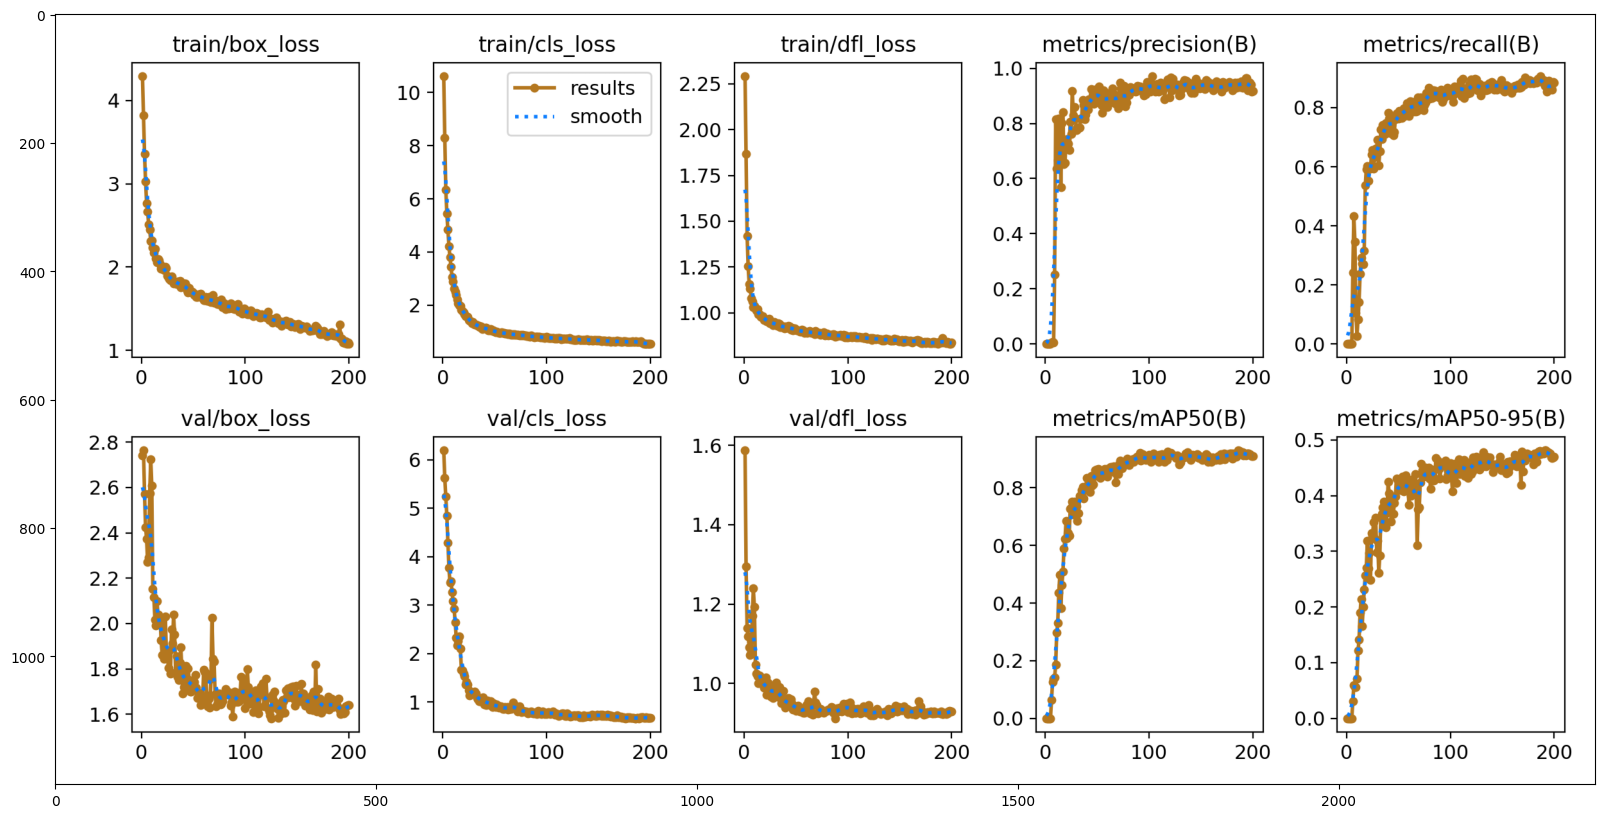

In [17]:
import os
import cv2
import matplotlib.pyplot as plt
training_save_dir = './' + str(results.save_dir)

plt.figure(figsize=(20, 10))
img = cv2.imread(os.path.join(training_save_dir, 'results.png'))
plt.imshow(img)
plt.show()

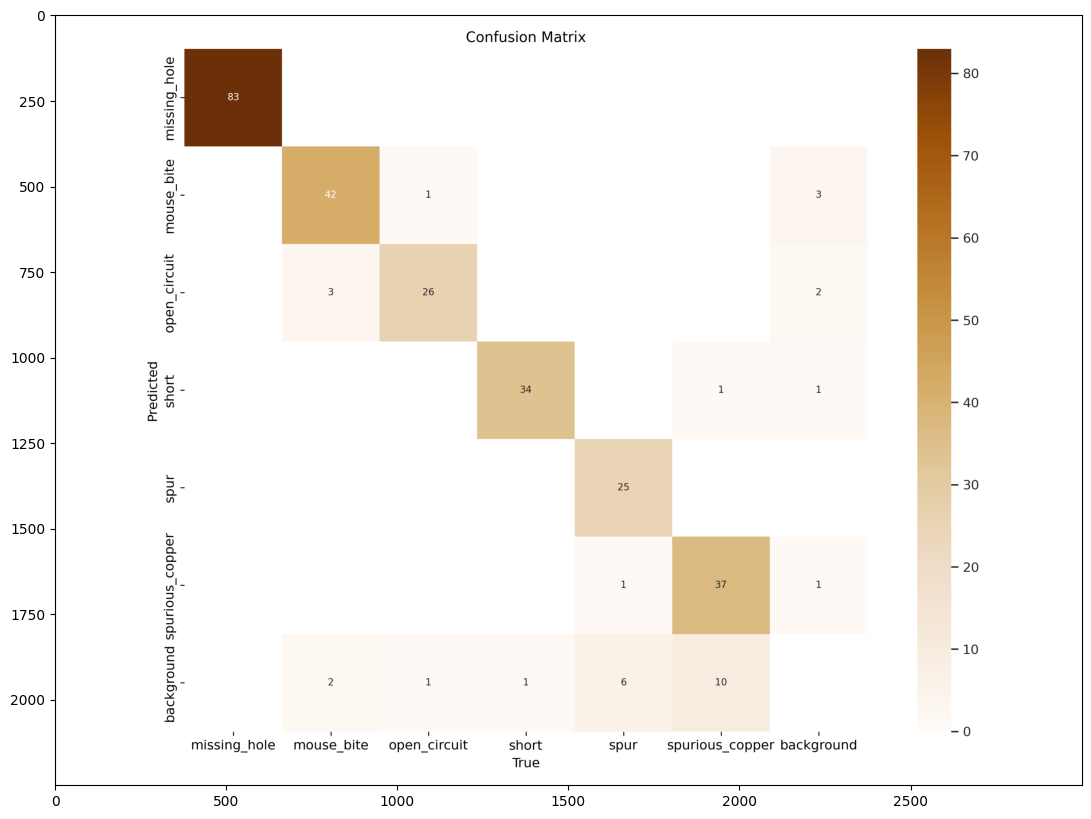

In [18]:
plt.figure(figsize=(20, 10))
img = cv2.imread(os.path.join(training_save_dir, 'confusion_matrix.png'))
plt.imshow(img)
plt.show()

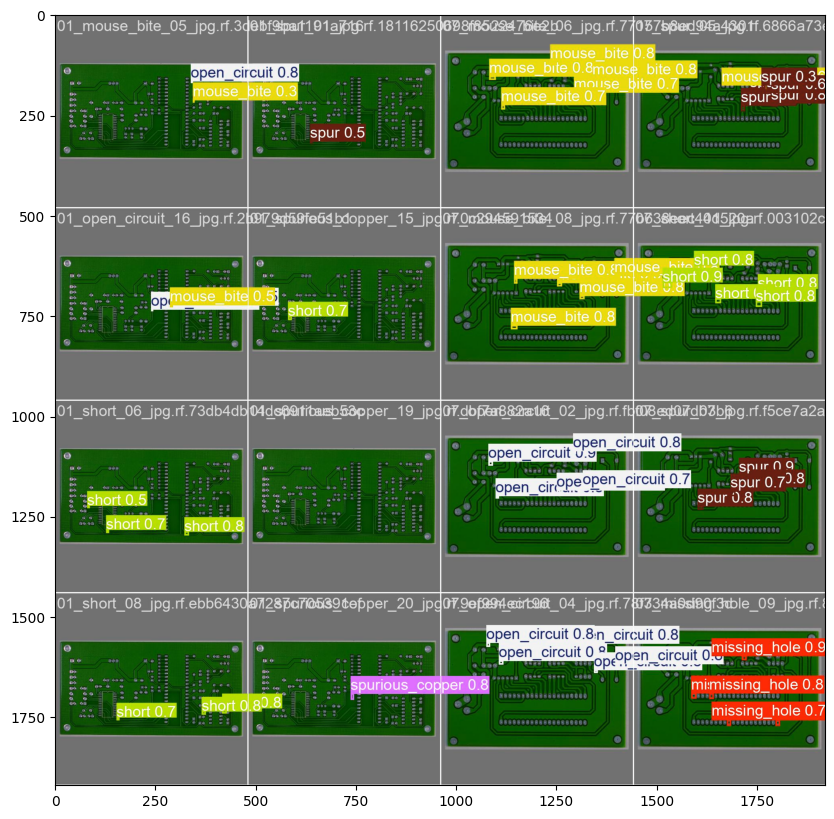

In [20]:
plt.figure(figsize=(20, 10))
img = cv2.imread(os.path.join(training_save_dir, 'val_batch0_pred.jpg'))
plt.imshow(img)
plt.show()

In [25]:
from sahi.predict import predict
predictions = predict(
    source='/content/PCB_Dataset_Defect/test/images',
    model_type = "yolov8",
    model_path = './runs/detect/train3/weights/best.pt',
    model_confidence_threshold=0.3,
    model_device='cuda:0',
    slice_height=128,
    slice_width=128,
    overlap_height_ratio=0.2,
    overlap_width_ratio=0.2,
  )

There are 90 listed files in folder: images/


Performing inference on images:   0%|          | 0/90 [00:00<?, ?it/s]

Performing prediction on 567 slices.


Performing inference on images:   0%|          | 0/90 [00:05<?, ?it/s]

Prediction time is: 5942.75 ms


Performing inference on images:   1%|          | 1/90 [00:06<09:21,  6.31s/it]

Performing prediction on 625 slices.


Performing inference on images:   1%|          | 1/90 [00:13<09:21,  6.31s/it]

Prediction time is: 7603.05 ms


Performing inference on images:   2%|▏         | 2/90 [00:14<10:40,  7.28s/it]

Performing prediction on 480 slices.


Performing inference on images:   2%|▏         | 2/90 [00:19<10:40,  7.28s/it]

Prediction time is: 4974.90 ms


Performing inference on images:   3%|▎         | 3/90 [00:19<09:12,  6.35s/it]

Performing prediction on 532 slices.


Performing inference on images:   3%|▎         | 3/90 [00:25<09:12,  6.35s/it]

Prediction time is: 5995.59 ms


Performing inference on images:   4%|▍         | 4/90 [00:26<09:09,  6.39s/it]

Performing prediction on 567 slices.


Performing inference on images:   4%|▍         | 4/90 [00:32<09:09,  6.39s/it]

Prediction time is: 6248.90 ms


Performing inference on images:   6%|▌         | 5/90 [00:32<09:09,  6.47s/it]

Performing prediction on 567 slices.


Performing inference on images:   6%|▌         | 5/90 [00:38<09:09,  6.47s/it]

Prediction time is: 5835.00 ms


Performing inference on images:   7%|▋         | 6/90 [00:38<08:58,  6.42s/it]

Performing prediction on 625 slices.


Performing inference on images:   7%|▋         | 6/90 [00:46<08:58,  6.42s/it]

Prediction time is: 7544.46 ms


Performing inference on images:   8%|▊         | 7/90 [00:46<09:33,  6.91s/it]

Performing prediction on 480 slices.


Performing inference on images:   8%|▊         | 7/90 [00:52<09:33,  6.91s/it]

Prediction time is: 5501.04 ms


Performing inference on images:   9%|▉         | 8/90 [00:52<08:59,  6.58s/it]

Performing prediction on 625 slices.


Performing inference on images:   9%|▉         | 8/90 [00:59<08:59,  6.58s/it]

Prediction time is: 7187.77 ms


Performing inference on images:  10%|█         | 9/90 [01:00<09:18,  6.89s/it]

Performing prediction on 480 slices.


Performing inference on images:  10%|█         | 9/90 [01:05<09:18,  6.89s/it]

Prediction time is: 4857.76 ms


Performing inference on images:  11%|█         | 10/90 [01:05<08:27,  6.35s/it]

Performing prediction on 644 slices.


Performing inference on images:  11%|█         | 10/90 [01:13<08:27,  6.35s/it]

Prediction time is: 7686.72 ms


Performing inference on images:  12%|█▏        | 11/90 [01:13<09:02,  6.87s/it]

Performing prediction on 525 slices.


Performing inference on images:  12%|█▏        | 11/90 [01:18<09:02,  6.87s/it]

Prediction time is: 5207.19 ms


Performing inference on images:  13%|█▎        | 12/90 [01:19<08:23,  6.46s/it]

Performing prediction on 484 slices.


Performing inference on images:  13%|█▎        | 12/90 [01:25<08:23,  6.46s/it]

Prediction time is: 6082.46 ms


Performing inference on images:  14%|█▍        | 13/90 [01:25<08:15,  6.44s/it]

Performing prediction on 720 slices.


Performing inference on images:  14%|█▍        | 13/90 [01:32<08:15,  6.44s/it]

Prediction time is: 7125.75 ms


Performing inference on images:  16%|█▌        | 14/90 [01:32<08:35,  6.78s/it]

Performing prediction on 625 slices.


Performing inference on images:  16%|█▌        | 14/90 [01:40<08:35,  6.78s/it]

Prediction time is: 7478.01 ms


Performing inference on images:  17%|█▋        | 15/90 [01:40<08:52,  7.10s/it]

Performing prediction on 480 slices.


Performing inference on images:  17%|█▋        | 15/90 [01:45<08:52,  7.10s/it]

Prediction time is: 4818.35 ms


Performing inference on images:  18%|█▊        | 16/90 [01:45<08:00,  6.50s/it]

Performing prediction on 525 slices.


Performing inference on images:  18%|█▊        | 16/90 [01:52<08:00,  6.50s/it]

Prediction time is: 6596.18 ms


Performing inference on images:  19%|█▉        | 17/90 [01:52<08:03,  6.62s/it]

Performing prediction on 720 slices.


Performing inference on images:  19%|█▉        | 17/90 [01:59<08:03,  6.62s/it]

Prediction time is: 7162.81 ms


Performing inference on images:  20%|██        | 18/90 [02:00<08:18,  6.92s/it]

Performing prediction on 525 slices.


Performing inference on images:  20%|██        | 18/90 [02:07<08:18,  6.92s/it]

Prediction time is: 6629.65 ms


Performing inference on images:  21%|██        | 19/90 [02:07<08:11,  6.93s/it]

Performing prediction on 567 slices.


Performing inference on images:  21%|██        | 19/90 [02:13<08:11,  6.93s/it]

Prediction time is: 5681.55 ms


Performing inference on images:  22%|██▏       | 20/90 [02:13<07:46,  6.66s/it]

Performing prediction on 484 slices.


Performing inference on images:  22%|██▏       | 20/90 [02:19<07:46,  6.66s/it]

Prediction time is: 6124.98 ms


Performing inference on images:  23%|██▎       | 21/90 [02:19<07:34,  6.59s/it]

Performing prediction on 484 slices.


Performing inference on images:  23%|██▎       | 21/90 [02:24<07:34,  6.59s/it]

Prediction time is: 4860.30 ms


Performing inference on images:  24%|██▍       | 22/90 [02:24<06:58,  6.15s/it]

Performing prediction on 480 slices.


Performing inference on images:  24%|██▍       | 22/90 [02:30<06:58,  6.15s/it]

Prediction time is: 5138.68 ms


Performing inference on images:  26%|██▌       | 23/90 [02:30<06:39,  5.96s/it]

Performing prediction on 484 slices.


Performing inference on images:  26%|██▌       | 23/90 [02:36<06:39,  5.96s/it]

Prediction time is: 5781.92 ms


Performing inference on images:  27%|██▋       | 24/90 [02:36<06:35,  6.00s/it]

Performing prediction on 440 slices.


Performing inference on images:  27%|██▋       | 24/90 [02:41<06:35,  6.00s/it]

Prediction time is: 4467.58 ms


Performing inference on images:  28%|██▊       | 25/90 [02:41<06:05,  5.62s/it]

Performing prediction on 720 slices.


Performing inference on images:  28%|██▊       | 25/90 [02:49<06:05,  5.62s/it]

Prediction time is: 8528.70 ms


Performing inference on images:  29%|██▉       | 26/90 [02:50<07:03,  6.62s/it]

Performing prediction on 720 slices.


Performing inference on images:  29%|██▉       | 26/90 [02:57<07:03,  6.62s/it]

Prediction time is: 7358.62 ms


Performing inference on images:  30%|███       | 27/90 [02:58<07:22,  7.03s/it]

Performing prediction on 480 slices.


Performing inference on images:  30%|███       | 27/90 [03:04<07:22,  7.03s/it]

Prediction time is: 5897.94 ms


Performing inference on images:  31%|███       | 28/90 [03:04<06:59,  6.77s/it]

Performing prediction on 480 slices.


Performing inference on images:  31%|███       | 28/90 [03:09<06:59,  6.77s/it]

Prediction time is: 4928.39 ms


Performing inference on images:  32%|███▏      | 29/90 [03:09<06:24,  6.30s/it]

Performing prediction on 567 slices.


Performing inference on images:  32%|███▏      | 29/90 [03:16<06:24,  6.30s/it]

Prediction time is: 7007.84 ms


Performing inference on images:  33%|███▎      | 30/90 [03:16<06:36,  6.62s/it]

Performing prediction on 480 slices.


Performing inference on images:  33%|███▎      | 30/90 [03:21<06:36,  6.62s/it]

Prediction time is: 4995.47 ms


Performing inference on images:  34%|███▍      | 31/90 [03:22<06:06,  6.21s/it]

Performing prediction on 484 slices.


Performing inference on images:  34%|███▍      | 31/90 [03:27<06:06,  6.21s/it]

Prediction time is: 5631.67 ms


Performing inference on images:  36%|███▌      | 32/90 [03:28<05:57,  6.16s/it]

Performing prediction on 720 slices.


Performing inference on images:  36%|███▌      | 32/90 [03:35<05:57,  6.16s/it]

Prediction time is: 7618.78 ms


Performing inference on images:  37%|███▋      | 33/90 [03:36<06:23,  6.73s/it]

Performing prediction on 480 slices.


Performing inference on images:  37%|███▋      | 33/90 [03:42<06:23,  6.73s/it]

Prediction time is: 5749.91 ms


Performing inference on images:  38%|███▊      | 34/90 [03:42<06:06,  6.55s/it]

Performing prediction on 644 slices.


Performing inference on images:  38%|███▊      | 34/90 [03:49<06:06,  6.55s/it]

Prediction time is: 6660.35 ms


Performing inference on images:  39%|███▉      | 35/90 [03:49<06:08,  6.70s/it]

Performing prediction on 484 slices.


Performing inference on images:  39%|███▉      | 35/90 [03:54<06:08,  6.70s/it]

Prediction time is: 5400.17 ms


Performing inference on images:  40%|████      | 36/90 [03:55<05:46,  6.42s/it]

Performing prediction on 567 slices.


Performing inference on images:  40%|████      | 36/90 [04:01<05:46,  6.42s/it]

Prediction time is: 6377.95 ms


Performing inference on images:  41%|████      | 37/90 [04:02<05:45,  6.52s/it]

Performing prediction on 480 slices.


Performing inference on images:  41%|████      | 37/90 [04:06<05:45,  6.52s/it]

Prediction time is: 4828.52 ms


Performing inference on images:  42%|████▏     | 38/90 [04:07<05:16,  6.09s/it]

Performing prediction on 625 slices.


Performing inference on images:  42%|████▏     | 38/90 [04:14<05:16,  6.09s/it]

Prediction time is: 7522.09 ms


Performing inference on images:  43%|████▎     | 39/90 [04:15<05:38,  6.63s/it]

Performing prediction on 532 slices.


Performing inference on images:  43%|████▎     | 39/90 [04:20<05:38,  6.63s/it]

Prediction time is: 5286.04 ms


Performing inference on images:  44%|████▍     | 40/90 [04:20<05:16,  6.32s/it]

Performing prediction on 625 slices.


Performing inference on images:  44%|████▍     | 40/90 [04:28<05:16,  6.32s/it]

Prediction time is: 7512.52 ms


Performing inference on images:  46%|████▌     | 41/90 [04:28<05:32,  6.79s/it]

Performing prediction on 567 slices.


Performing inference on images:  46%|████▌     | 41/90 [04:34<05:32,  6.79s/it]

Prediction time is: 5686.14 ms


Performing inference on images:  47%|████▋     | 42/90 [04:34<05:15,  6.57s/it]

Performing prediction on 484 slices.


Performing inference on images:  47%|████▋     | 42/90 [04:40<05:15,  6.57s/it]

Prediction time is: 6146.42 ms


Performing inference on images:  48%|████▊     | 43/90 [04:40<05:06,  6.53s/it]

Performing prediction on 480 slices.


Performing inference on images:  48%|████▊     | 43/90 [04:45<05:06,  6.53s/it]

Prediction time is: 4909.35 ms


Performing inference on images:  49%|████▉     | 44/90 [04:46<04:41,  6.12s/it]

Performing prediction on 525 slices.


Performing inference on images:  49%|████▉     | 44/90 [04:52<04:41,  6.12s/it]

Prediction time is: 6407.77 ms


Performing inference on images:  50%|█████     | 45/90 [04:52<04:44,  6.32s/it]

Performing prediction on 720 slices.


Performing inference on images:  50%|█████     | 45/90 [05:00<04:44,  6.32s/it]

Prediction time is: 7152.54 ms


Performing inference on images:  51%|█████     | 46/90 [05:00<04:55,  6.71s/it]

Performing prediction on 480 slices.


Performing inference on images:  51%|█████     | 46/90 [05:06<04:55,  6.71s/it]

Prediction time is: 6131.43 ms


Performing inference on images:  52%|█████▏    | 47/90 [05:06<04:44,  6.62s/it]

Performing prediction on 480 slices.


Performing inference on images:  52%|█████▏    | 47/90 [05:11<04:44,  6.62s/it]

Prediction time is: 4912.97 ms


Performing inference on images:  53%|█████▎    | 48/90 [05:12<04:20,  6.19s/it]

Performing prediction on 567 slices.


Performing inference on images:  53%|█████▎    | 48/90 [05:18<04:20,  6.19s/it]

Prediction time is: 6182.50 ms


Performing inference on images:  54%|█████▍    | 49/90 [05:18<04:19,  6.33s/it]

Performing prediction on 525 slices.


Performing inference on images:  54%|█████▍    | 49/90 [05:24<04:19,  6.33s/it]

Prediction time is: 5782.99 ms


Performing inference on images:  56%|█████▌    | 50/90 [05:24<04:10,  6.26s/it]

Performing prediction on 480 slices.


Performing inference on images:  56%|█████▌    | 50/90 [05:29<04:10,  6.26s/it]

Prediction time is: 4815.66 ms


Performing inference on images:  57%|█████▋    | 51/90 [05:29<03:50,  5.90s/it]

Performing prediction on 644 slices.


Performing inference on images:  57%|█████▋    | 51/90 [05:37<03:50,  5.90s/it]

Prediction time is: 7810.39 ms


Performing inference on images:  58%|█████▊    | 52/90 [05:38<04:10,  6.59s/it]

Performing prediction on 480 slices.


Performing inference on images:  58%|█████▊    | 52/90 [05:43<04:10,  6.59s/it]

Prediction time is: 4894.71 ms


Performing inference on images:  59%|█████▉    | 53/90 [05:43<03:47,  6.16s/it]

Performing prediction on 532 slices.


Performing inference on images:  59%|█████▉    | 53/90 [05:49<03:47,  6.16s/it]

Prediction time is: 6547.59 ms


Performing inference on images:  60%|██████    | 54/90 [05:50<03:49,  6.37s/it]

Performing prediction on 484 slices.


Performing inference on images:  60%|██████    | 54/90 [05:54<03:49,  6.37s/it]

Prediction time is: 4832.41 ms


Performing inference on images:  61%|██████    | 55/90 [05:55<03:29,  5.99s/it]

Performing prediction on 480 slices.


Performing inference on images:  61%|██████    | 55/90 [06:01<03:29,  5.99s/it]

Prediction time is: 5875.95 ms


Performing inference on images:  62%|██████▏   | 56/90 [06:01<03:26,  6.07s/it]

Performing prediction on 480 slices.


Performing inference on images:  62%|██████▏   | 56/90 [06:06<03:26,  6.07s/it]

Prediction time is: 5042.77 ms


Performing inference on images:  63%|██████▎   | 57/90 [06:06<03:12,  5.85s/it]

Performing prediction on 484 slices.


Performing inference on images:  63%|██████▎   | 57/90 [06:11<03:12,  5.85s/it]

Prediction time is: 4861.14 ms


Performing inference on images:  64%|██████▍   | 58/90 [06:12<03:00,  5.64s/it]

Performing prediction on 525 slices.


Performing inference on images:  64%|██████▍   | 58/90 [06:18<03:00,  5.64s/it]

Prediction time is: 6338.36 ms


Performing inference on images:  66%|██████▌   | 59/90 [06:18<03:04,  5.94s/it]

Performing prediction on 480 slices.


Performing inference on images:  66%|██████▌   | 59/90 [06:23<03:04,  5.94s/it]

Prediction time is: 4965.82 ms


Performing inference on images:  67%|██████▋   | 60/90 [06:23<02:51,  5.73s/it]

Performing prediction on 625 slices.


Performing inference on images:  67%|██████▋   | 60/90 [06:31<02:51,  5.73s/it]

Prediction time is: 7535.09 ms


Performing inference on images:  68%|██████▊   | 61/90 [06:31<03:05,  6.38s/it]

Performing prediction on 440 slices.


Performing inference on images:  68%|██████▊   | 61/90 [06:36<03:05,  6.38s/it]

Prediction time is: 4357.46 ms


Performing inference on images:  69%|██████▉   | 62/90 [06:36<02:43,  5.85s/it]

Performing prediction on 525 slices.


Performing inference on images:  69%|██████▉   | 62/90 [06:42<02:43,  5.85s/it]

Prediction time is: 6252.11 ms


Performing inference on images:  70%|███████   | 63/90 [06:43<02:44,  6.11s/it]

Performing prediction on 567 slices.


Performing inference on images:  70%|███████   | 63/90 [06:48<02:44,  6.11s/it]

Prediction time is: 5698.70 ms


Performing inference on images:  71%|███████   | 64/90 [06:49<02:38,  6.09s/it]

Performing prediction on 484 slices.


Performing inference on images:  71%|███████   | 64/90 [06:54<02:38,  6.09s/it]

Prediction time is: 5168.06 ms


Performing inference on images:  72%|███████▏  | 65/90 [06:54<02:28,  5.94s/it]

Performing prediction on 525 slices.


Performing inference on images:  72%|███████▏  | 65/90 [07:00<02:28,  5.94s/it]

Prediction time is: 6152.71 ms


Performing inference on images:  73%|███████▎  | 66/90 [07:01<02:26,  6.10s/it]

Performing prediction on 480 slices.


Performing inference on images:  73%|███████▎  | 66/90 [07:06<02:26,  6.10s/it]

Prediction time is: 4917.17 ms


Performing inference on images:  74%|███████▍  | 67/90 [07:06<02:13,  5.82s/it]

Performing prediction on 480 slices.


Performing inference on images:  74%|███████▍  | 67/90 [07:12<02:13,  5.82s/it]

Prediction time is: 6334.42 ms


Performing inference on images:  76%|███████▌  | 68/90 [07:13<02:13,  6.06s/it]

Performing prediction on 720 slices.


Performing inference on images:  76%|███████▌  | 68/90 [07:20<02:13,  6.06s/it]

Prediction time is: 7108.84 ms


Performing inference on images:  77%|███████▋  | 69/90 [07:20<02:16,  6.50s/it]

Performing prediction on 644 slices.


Performing inference on images:  77%|███████▋  | 69/90 [07:28<02:16,  6.50s/it]

Prediction time is: 7842.73 ms


Performing inference on images:  78%|███████▊  | 70/90 [07:28<02:20,  7.01s/it]

Performing prediction on 625 slices.


Performing inference on images:  78%|███████▊  | 70/90 [07:34<02:20,  7.01s/it]

Prediction time is: 6207.42 ms


Performing inference on images:  79%|███████▉  | 71/90 [07:35<02:10,  6.89s/it]

Performing prediction on 484 slices.


Performing inference on images:  79%|███████▉  | 71/90 [07:41<02:10,  6.89s/it]

Prediction time is: 6158.90 ms


Performing inference on images:  80%|████████  | 72/90 [07:41<02:01,  6.75s/it]

Performing prediction on 644 slices.


Performing inference on images:  80%|████████  | 72/90 [07:48<02:01,  6.75s/it]

Prediction time is: 6381.95 ms


Performing inference on images:  81%|████████  | 73/90 [07:48<01:54,  6.75s/it]

Performing prediction on 480 slices.


Performing inference on images:  81%|████████  | 73/90 [07:54<01:54,  6.75s/it]

Prediction time is: 6260.57 ms


Performing inference on images:  82%|████████▏ | 74/90 [07:55<01:46,  6.68s/it]

Performing prediction on 567 slices.


Performing inference on images:  82%|████████▏ | 74/90 [08:00<01:46,  6.68s/it]

Prediction time is: 5675.42 ms


Performing inference on images:  83%|████████▎ | 75/90 [08:01<01:37,  6.49s/it]

Performing prediction on 484 slices.


Performing inference on images:  83%|████████▎ | 75/90 [08:06<01:37,  6.49s/it]

Prediction time is: 5670.76 ms


Performing inference on images:  84%|████████▍ | 76/90 [08:07<01:29,  6.36s/it]

Performing prediction on 567 slices.


Performing inference on images:  84%|████████▍ | 76/90 [08:13<01:29,  6.36s/it]

Prediction time is: 6205.62 ms


Performing inference on images:  86%|████████▌ | 77/90 [08:13<01:23,  6.42s/it]

Performing prediction on 480 slices.


Performing inference on images:  86%|████████▌ | 77/90 [08:18<01:23,  6.42s/it]

Prediction time is: 5163.04 ms


Performing inference on images:  87%|████████▋ | 78/90 [08:19<01:13,  6.16s/it]

Performing prediction on 484 slices.


Performing inference on images:  87%|████████▋ | 78/90 [08:24<01:13,  6.16s/it]

Prediction time is: 5653.14 ms


Performing inference on images:  88%|████████▊ | 79/90 [08:25<01:07,  6.10s/it]

Performing prediction on 484 slices.


Performing inference on images:  88%|████████▊ | 79/90 [08:30<01:07,  6.10s/it]

Prediction time is: 4841.33 ms


Performing inference on images:  89%|████████▉ | 80/90 [08:30<00:58,  5.81s/it]

Performing prediction on 480 slices.


Performing inference on images:  89%|████████▉ | 80/90 [08:36<00:58,  5.81s/it]

Prediction time is: 6235.94 ms


Performing inference on images:  90%|█████████ | 81/90 [08:36<00:54,  6.01s/it]

Performing prediction on 625 slices.


Performing inference on images:  90%|█████████ | 81/90 [08:43<00:54,  6.01s/it]

Prediction time is: 6296.39 ms


Performing inference on images:  91%|█████████ | 82/90 [08:43<00:49,  6.21s/it]

Performing prediction on 720 slices.


Performing inference on images:  91%|█████████ | 82/90 [08:52<00:49,  6.21s/it]

Prediction time is: 8536.60 ms


Performing inference on images:  92%|█████████▏| 83/90 [08:52<00:49,  7.04s/it]

Performing prediction on 525 slices.


Performing inference on images:  92%|█████████▏| 83/90 [08:57<00:49,  7.04s/it]

Prediction time is: 5275.90 ms


Performing inference on images:  93%|█████████▎| 84/90 [08:58<00:39,  6.61s/it]

Performing prediction on 480 slices.


Performing inference on images:  93%|█████████▎| 84/90 [09:04<00:39,  6.61s/it]

Prediction time is: 6303.44 ms


Performing inference on images:  94%|█████████▍| 85/90 [09:04<00:32,  6.60s/it]

Performing prediction on 644 slices.


Performing inference on images:  94%|█████████▍| 85/90 [09:11<00:32,  6.60s/it]

Prediction time is: 6397.27 ms


Performing inference on images:  96%|█████████▌| 86/90 [09:11<00:26,  6.65s/it]

Performing prediction on 567 slices.


Performing inference on images:  96%|█████████▌| 86/90 [09:18<00:26,  6.65s/it]

Prediction time is: 6969.16 ms


Performing inference on images:  97%|█████████▋| 87/90 [09:18<00:20,  6.85s/it]

Performing prediction on 720 slices.


Performing inference on images:  97%|█████████▋| 87/90 [09:25<00:20,  6.85s/it]

Prediction time is: 7214.95 ms


Performing inference on images:  98%|█████████▊| 88/90 [09:26<00:14,  7.10s/it]

Performing prediction on 484 slices.


Performing inference on images:  98%|█████████▊| 88/90 [09:32<00:14,  7.10s/it]

Prediction time is: 6079.27 ms


Performing inference on images:  99%|█████████▉| 89/90 [09:32<00:06,  6.88s/it]

Performing prediction on 567 slices.


Performing inference on images:  99%|█████████▉| 89/90 [09:38<00:06,  6.88s/it]

Prediction time is: 5687.94 ms


Performing inference on images: 100%|██████████| 90/90 [09:38<00:00,  6.43s/it]

Prediction results are successfully exported to runs/predict/exp3


In [34]:
import locale
locale.getpreferredencoding = lambda: "UTF-8"
!cp -rp "./runs" "/content/drive/MyDrive/runs"